# Medical Data Visualizer


##### Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

- Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
path = "C:/Users/milen/Desktop/Python_freecode/cardio_train.csv"

In [4]:
df = pd.read_csv(path, sep = ";")

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.index

RangeIndex(start=0, stop=70000, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.size

910000

In [9]:
df.shape

(70000, 13)

In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [12]:
df.dtypes.value_counts()

int64      12
float64     1
dtype: int64

In [13]:
df['height']

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 70000, dtype: int64

In [14]:
height_2 = df['height'] * 2

In [15]:
height_2

0        336
1        312
2        330
3        338
4        312
        ... 
69995    336
69996    316
69997    366
69998    326
69999    340
Name: height, Length: 70000, dtype: int64

In [16]:
df['weight']

0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 70000, dtype: float64

In [17]:
df['overweight'] = df['weight'] / height_2 * 100

In [18]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,18.452381
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,27.243590
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,19.393939
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,24.260355
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,17.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,22.619048
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,39.873418
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,28.688525
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,22.085890


In [19]:
df['BMI'] = df['overweight'] >= 25.00

In [20]:
df['BMI'] = pd.get_dummies(df['BMI'])

In [21]:
df.head(50)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,18.452381,1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,27.243590,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,19.393939,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,24.260355,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,17.948718,1
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,22.185430,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,29.617834,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,26.685393,0
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,22.468354,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,20.731707,1


In [22]:
df['overweight'].value_counts()

19.696970    944
25.000000    883
20.000000    861
18.750000    778
20.588235    535
            ... 
35.502959      1
17.379679      1
30.612245      1
15.229885      1
27.007299      1
Name: overweight, Length: 3470, dtype: int64

In [64]:
df['cholesterol'].value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [58]:
df['cholesterol'].mask(df['cholesterol'] == 1, '0', inplace=True)

In [60]:
df['cholesterol'].mask(df['cholesterol'] == 2, '1', inplace=True)

In [62]:
df['cholesterol'].mask(df['cholesterol'] == 3, '1', inplace=True)

In [69]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,18.452381,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,27.243590,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,19.393939,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,24.260355,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,17.948718,1


In [65]:
df['gluc'].mask(df['gluc'] == 1, '0', inplace=True)

In [66]:
df['gluc'].mask(df['gluc'] == 2, '1', inplace=True)

In [67]:
df['gluc'].mask(df['gluc'] == 3, '1', inplace=True)

In [68]:
df['gluc'].value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

In [72]:
df2 = df[['active', 'alco', 'cholesterol', 'gluc', 'BMI', 'smoke', 'cardio']]

In [73]:
df2.head()

,active,alco,cholesterol,gluc,BMI,smoke,cardio
0,1,0,0,0,1,0,0
1,1,0,1,0,0,0,1
2,0,0,1,0,1,0,1
3,1,0,0,0,1,0,1
4,0,0,0,0,1,0,0


In [77]:
vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "BMI"])

In [78]:
df_cat = pd.melt(
    df, 
    id_vars=["cardio"], 
    value_vars=vars
)

In [79]:
df_cat

,cardio,variable,value
0,0,BMI,1
1,1,BMI,0
2,1,BMI,1
3,1,BMI,1
4,0,BMI,1
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [80]:
df_cat = df_cat.value_counts().reset_index(name = "total")

In [81]:
df_cat

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,BMI,1,28840
7,0,active,1,28643
8,1,gluc,0,28585
9,1,active,1,27618


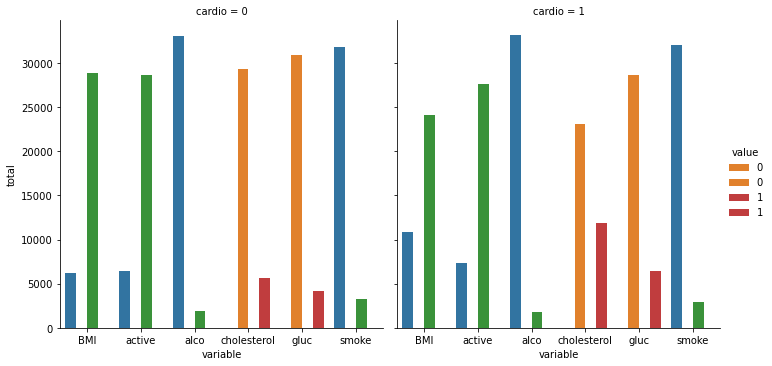

In [90]:
fig = sns.catplot(
        data = df_cat, 
        x = "variable", 
        y = "total", 
        hue="value", 
        col="cardio", 
        kind = "bar", 
        order=vars, 
        )

In [91]:
fig.set_ylabels("total")
fig.set_xlabels("variable")
fig = fig.fig

In [92]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,18.452381,1
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,27.243590,0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,19.393939,1
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,24.260355,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,17.948718,1


In [93]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,overweight,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,0.088129,0.053771,0.803729,0.499700,22.573159,0.755957
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.283484,0.225568,0.397179,0.500003,4.286086,0.429521
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,3.030303,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,19.696970,1.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,21.818182,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,24.838710,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,112.000000,1.000000


In [99]:
df_heat = df.loc[
      (df["ap_lo"]  <= df["ap_hi"])
    & (df["height"] >= df["height"].quantile(0.025))
    & (df["height"] <= df["height"].quantile(0.975)) 
    & (df["weight"] >= df["weight"].quantile(0.025))
    & (df["weight"] <= df["weight"].quantile(0.975))
]

In [101]:
corr = df_heat.corr()

In [102]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,overweight,BMI,d_aplo_ap_hi
id,1.000000,0.002507,0.003730,0.000326,0.000149,0.003492,0.000484,-0.002732,-0.000708,0.005891,0.003900,0.000050,-0.001160,NaN
age,0.002507,1.000000,-0.018320,-0.076932,0.070168,0.018689,0.153508,-0.044371,-0.026970,-0.011445,0.240241,0.093640,-0.066764,NaN
gender,0.003730,-0.018320,1.000000,0.506447,0.130193,0.005063,0.059743,0.337855,0.168887,0.007791,0.002349,-0.004923,0.027570,NaN
height,0.000326,-0.076932,0.506447,1.000000,0.251503,0.004586,0.017922,0.187830,0.089785,-0.005661,-0.024102,-0.010434,0.044447,NaN
weight,0.000149,0.070168,0.130193,0.251503,1.000000,0.027030,0.227922,0.056533,0.059917,-0.014430,0.170042,0.964339,-0.761694,NaN
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,-0.001928,0.000769,-0.000222,0.050556,0.026873,-0.019479,NaN
ap_lo,0.000484,0.153508,0.059743,0.017922,0.227922,0.072803,1.000000,0.023275,0.033042,0.001569,0.327181,0.230248,-0.180165,NaN
smoke,-0.002732,-0.044371,0.337855,0.187830,0.056533,-0.001928,0.023275,1.000000,0.341200,0.026940,-0.020345,0.006864,0.000838,NaN
alco,-0.000708,-0.026970,0.168887,0.089785,0.059917,0.000769,0.033042,0.341200,1.000000,0.025847,-0.011088,0.036978,-0.027785,NaN
active,0.005891,-0.011445,0.007791,-0.005661,-0.014430,-0.000222,0.001569,0.026940,0.025847,1.000000,-0.037339,-0.013607,0.014454,NaN


In [121]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

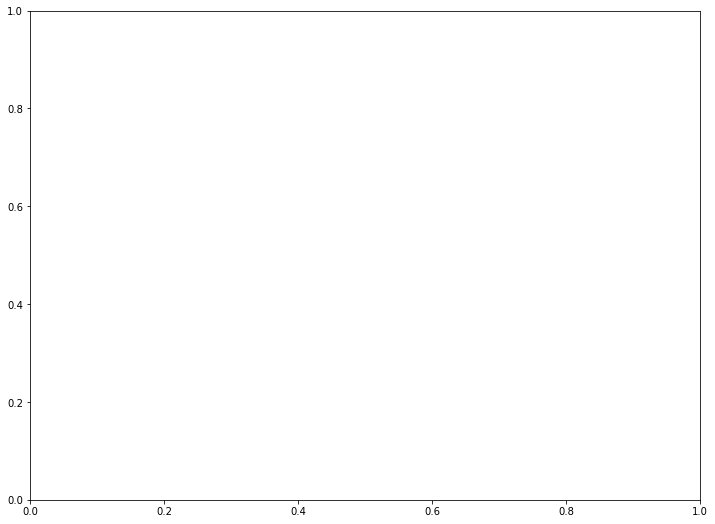

In [118]:
fig, plot = plt.subplots(figsize=(12, 9))

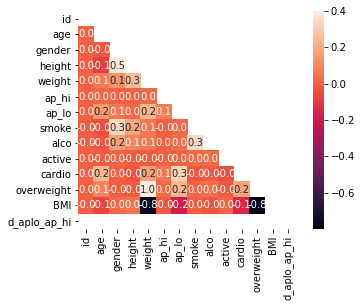

In [123]:
plot = sns.heatmap(
        corr, 
        mask=mask,
        vmax = 0.4,
        square = True, 
        fmt = ".1f", 
        annot=True,
)